# Data Handling and Visuialisation (7PAM2004) – Week 4 Tutorial 

## Today we will complete remaining exercises from Weeks 2 and 3

### Objectives:
+ Experience with basic Python, numpy, pandas, and matplotlib
+ Practice reading CSV and parquet files
+ Practice manipulating arrays and making plots
+ Practice interpreting plots 

### The online python documentation is a particularly useful resource that can help you with this tutorial
### https://matplotlib.org/stable/users/index

### Exercise 1: Stars from the European Space Agency's Gaia Mission

I have performed a query of ESA's Gaia database to pick 1000 randomly selected stars. Gaia provides photometry (measures of brightness) and astrometry (measures of the very slight motions of the stars on the sky).

The queried file is called: https://star.herts.ac.uk/~kuhn/DHV/gaia_random1000.parquet

Recall that a parquet file may be read with the following pandas function:
```python
gaia = pd.read_parquet('')
```

Read this file and inspect the contents.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gaia = pd.read_parquet('gaia_random1000.parquet')

print(gaia)



               source_id          ra        dec  parallax  parallax_error  \
0    5889059805439854848  234.271140 -52.218658  0.231855        0.067457   
1    2026240608225775360  293.518842  28.533663  0.386283        0.079612   
2    5889050803187502976  233.816075 -52.261231  0.325157        0.089158   
3    1870129370301798784  310.979513  34.486223  0.568267        0.058328   
4    5543541609247095168  127.206923 -34.350520  0.260559        0.060022   
..                   ...         ...        ...       ...             ...   
995  5998960180159002752  231.886476 -46.905728  0.918638        0.160481   
996  5804152150222650880  258.849447 -72.533495  0.474966        0.101716   
997  4065783305628473984  271.931501 -25.071045  1.598878        0.285806   
998  4266496649293065728  282.924475   0.401698  1.862032        0.068592   
999  4090076190388847232  277.448826 -21.796924  0.755181        0.076631   

         pmra  pmra_error     pmdec  pmdec_error  phot_g_mean_mag  
0   -1.

We want to calculate two quantities for each star: the star's distance (how far it is) and it's luminosity (how much light it produces).

Distance can be calculated with the astrometric parallax quantity, where<br>
<div align="center">distance = 1000/parallax.</div>
The unit for distance in astronomy is the 'parsec', where 1 parsec = $3.08\times10^{13}$ km.

The brightness of a star is included in its magnitude (phot_g_mean_mag). <b>Brighter stars have smaller magnitudes.</b> Distant objects appear fainter, so we need to correct for this using the followwing formula
<div align="center">absolute magnitude = phot_g_mean_mag + 5 log$_{10}$(parallax) - 10</div>



In [22]:
# Calculates the quantities shown above
gaia['distance'] = 1000/gaia['parallax']
gaia['AbsoluteMagnitude'] = gaia['phot_g_mean_mag'] + 5*np.log10(gaia['parallax']) - 10

# It's helpful to convert some quantities to log. Each unit represents a factor of 10 increase.
gaia['log10_distance'] = np.log10(gaia['distance'])

In [23]:
gaia

,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,distance,AbsoluteMagnitude,log10_distance
0,5889059805439854848,234.271140,-52.218658,0.231855,0.067457,-1.118169,0.153004,-1.684435,0.122198,16.638042,4313.042516,3.464124,3.634784
1,2026240608225775360,293.518842,28.533663,0.386283,0.079612,-4.006486,0.100664,-8.814540,0.119978,16.985237,2588.776874,4.919764,3.413095
2,5889050803187502976,233.816075,-52.261231,0.325157,0.089158,-4.103142,0.192589,-4.256599,0.178762,16.839481,3075.439650,4.399945,3.487907
3,1870129370301798784,310.979513,34.486223,0.568267,0.058328,2.851161,0.080367,-3.774436,0.089485,16.415411,1759.735922,5.188173,3.245447
4,5543541609247095168,127.206923,-34.350520,0.260559,0.060022,-1.957424,0.083824,2.380031,0.107738,16.833437,3837.905097,3.912966,3.584094
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5998960180159002752,231.886476,-46.905728,0.918638,0.160481,-4.953650,0.340926,-6.085492,0.298792,17.849840,1088.567624,7.665563,3.036855
996,5804152150222650880,258.849447,-72.533495,0.474966,0.101716,-3.531570,0.149218,-5.003658,0.178121,17.508667,2105.412760,5.891981,3.323337
997,4065783305628473984,271.931501,-25.071045,1.598878,0.285806,-0.532816,0.523007,-2.477795,0.426249,18.402308,625.438395,9.421385,2.796185
998,4266496649293065728,282.924475,0.401698,1.862032,0.068592,1.480341,0.088946,-3.101312,0.083536,15.452104,537.047617,6.802040,2.730013


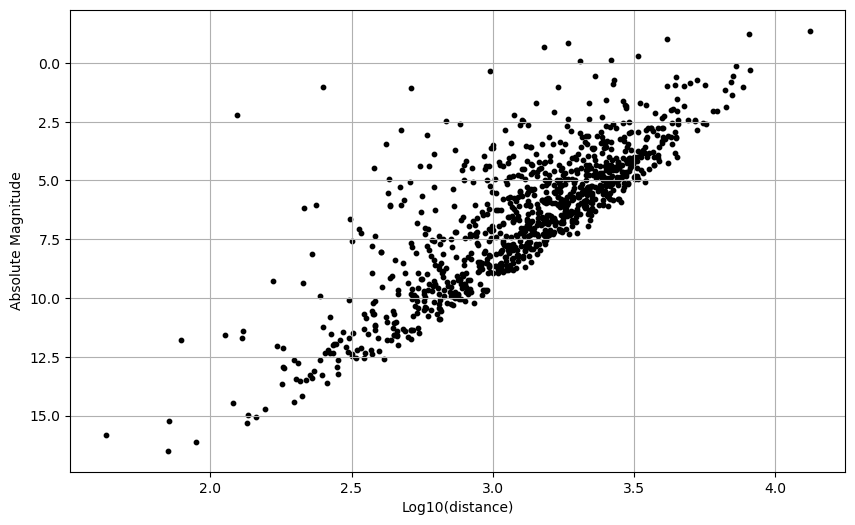

In [24]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.scatter(gaia['log10_distance'], gaia['AbsoluteMagnitude'], alpha=1, color='black', s=10)

# Brighter stars have smaller absolute magnitudes. (See above)
plt.gca().invert_yaxis()

# Add titles and labels
plt.xlabel('Log10(distance)')
plt.ylabel('Absolute Magnitude')

# Show grid (optional)
plt.grid(True)

What is happening in this plot? Is this reasonable considering that these are randomly selected stars?

Answer here.
We have calculated the absolute magnitude of the stars and the log distance of the stars. From the plot we can see that there is a string correlation between these data. The more distant stars tent to be more intrinsically bright ant the nearer stars tend to be more intrinsically faint.

More significally we have a strong *negative* correlation between absolute magnitude and log distance. This is negative because of the way absolute magnitude is defined. However, this negative interpretation can be intepreted as the strong positive correlation between distance an intrinsic brightness (as noted above).

Does this make sense?

Our Sun is just another star, like all other stars in this sample. It is not expected to be located at a special place in the universe. However, it looks like the stars nearest the sun are faint while the stars far from brightness ot be independent of their distance of sun.

One explanation might be how we calculate absolute magnitude. The Equation for magnitude phot_g_mean_mag + 5log (parallax) -10 has a dependency on parallax. Thus, a measurement error in parallax would affect both our derived distance and absolute magnitudes. This would cause these values to be partially correlated.




The inversion of the y-axis is common in HR diagrams since brighter stars have smaller absolute magnitudes. This helps to visually represent the luminosity of stars, where brighter stars are positioned higher up on the plot.

### Example 3: Histogram

The normal (or Gaussian) distribution is a probability distribution, where the most probable values are nearest the centre, and the probability of a value decreases (but never reaches zero) farther from the centre. These distributions are described by two parameters: the mean ($\mu$), which provides the location of the centre; and the standard deviation ($\sigma$), which gives the width of the distribution. 

The formula for the normal distribution is 

$p(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$

where $p(x)$ is the probability of measuring $x$.


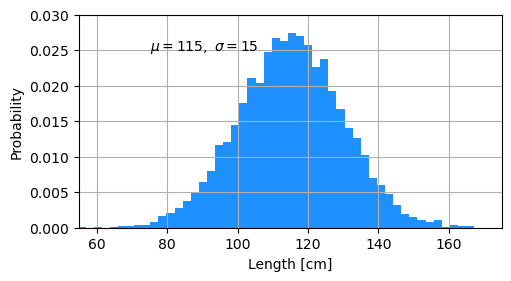

In [26]:
# Here we create a histogram of a normal distribution with mean 115 and standard deviation 15
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000) # Look up the numpy documentation for randn

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

# Here is the matplotlib code for a histogram
n, bins, patches = ax.hist(x, 50, density=True, color='dodgerblue')

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')

ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

### Exercise 3a: 

Now adjust the code above to plot a *uniform* distribution between 0 and 1. 

You may want to examine the online documentation for numpy.random. 


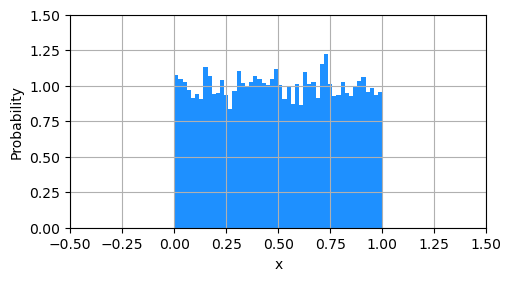

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a uniform distribution between 0 and 1
x = np.random.uniform(0, 1, 10000)

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

# Create the histogram for the uniform distribution
n, bins, patches = ax.hist(x, 50, density=True, color='dodgerblue')

ax.set_xlabel('x')
ax.set_ylabel('Probability')

# Adjust the axis parameters for the uniform distribution range
ax.axis([-0.5, 1.5, 0, 1.5])
ax.grid(True)


### Exercise 3b: 

Now use the pandas library to import the Trees dataset from the following CSV file:

https://star.herts.ac.uk/~kuhn/DHV/trees.csv

Make a histogram of each variable.

In [47]:
import pandas as pd

url = 'https://star.herts.ac.uk/~kuhn/DHV/trees.csv'

# Write your code to obtain data from trees.csv. (Hint: use the code in the slides from the last lecture.)
# Inspect the contents of this file so you know how to use it.

In [71]:
# Fill in the missing code. Some code has already been provided that may have helpful syntax

# The following code creates 3 subplots 
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), layout='constrained')

# ... code goes here ... 

# When plotting you can access the different subplots with indices
# for i in range(3):
#    axes[i].hist(... code goes here ...)
#    ... code goes here ... 

### Exercise 3c:

The cumulative distribution of a proability density function $p(x)$ is given by

$F(x) = \int_{-\infty}^{x} p(x^\prime) \, dx^\prime$

For an empirical distribution, the method 
```python
ax.ecdf(x)  
```
calculates and plots the 'empirical cumulative distribution function.'

For the distributions in Example 3 and Exercise 3a, please plot the corresponding empirical cumulative distribution functions.

#### In the following cell, please describe and explain the results from Exercise 3c. 

### Example 4: Error envelope

If you want to indicate uncertainty, the method ax.fill_between can be useful for showing the possible range of a function. The following code does not show real data, but illustrates the graphical capabilities of matplotlib.

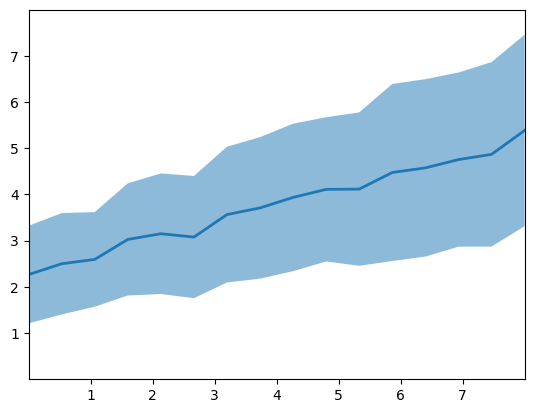

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# make data
np.random.seed(1)
x = np.linspace(0, 8, 16)
y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))

# plot
fig, ax = plt.subplots()

ax.fill_between(x, y1, y2, alpha=.5, linewidth=0)
ax.plot(x, (y1 + y2)/2, linewidth=2)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

### Exercise 4a: 

Modify the previous code in the following ways:
+ add grid lines
+ add axis labels x and y
+ make the centre line red and the envelope pink

### Exercise 4b: 

Please explain what each step in the code above is doing. E.g., what is 'alpha'?

(You can figure this out by either experimentation or reading the documentation.)